# Import necessary dependencies

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import numpy as np
import seaborn as sns

%matplotlib inline

# Load data & make data readable

In [78]:
table = pd.read_csv("data/HRDataset_v14.csv", sep=',')

In [79]:
table["DOB"] = pd.to_datetime(table["DOB"], format='%m/%d/%y')
table["DOB"] = table["DOB"].mask(table["DOB"].gt(pd.Timestamp('today')), table["DOB"]-pd.DateOffset(years=100))

table["DateofHire"] = pd.to_datetime(table["DateofHire"], format='%m/%d/%Y')
table["DateofHire"] = table["DateofHire"].mask(table["DateofHire"].gt(pd.Timestamp('today')), table["DateofHire"]-pd.DateOffset(years=100))

table["readableGender"] = table["GenderID"].apply(lambda value: "F" if value == 0 else "M")



In [80]:
tableCopy = table
male, female = [x for _, x in tableCopy.groupby(tableCopy['GenderID'] == 0)]

terminated, notTerminated = [x for _, x in tableCopy.groupby(tableCopy['Termd'] == 0)]

# Show dataset features and values

In [81]:
table.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences,readableGender
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1,M
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17,M
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3,F
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15,F
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2,F


# Exploratory Data Analysis and Visualizations

## Descriptive Statistics

In [82]:
subset_attributes = ['Salary', 'EngagementSurvey', 'EmpSatisfaction', 'Absences', 'DOB']
rs = round(table[subset_attributes].describe(),2)
display(rs)

,Salary,EngagementSurvey,EmpSatisfaction,Absences,DOB
count,311.00,311.00,311.00,311.00,311
mean,69020.68,4.11,3.89,10.24,1979-02-06 09:48:02.315112544
min,45046.00,1.12,1.00,1.00,1951-01-02 00:00:00
25%,55501.50,3.69,3.00,5.00,1973-12-03 00:00:00
50%,62810.00,4.28,4.00,10.00,1980-09-30 00:00:00
75%,72036.00,4.70,5.00,15.00,1986-05-29 12:00:00
max,250000.00,5.00,5.00,20.00,1992-08-17 00:00:00
std,25156.64,0.79,0.91,5.85,NaN


> Das Durchschnittsgehalt liegt bei $69.020 und jede:r Mitarbeiter:in hatte durchschnittlich 10 Abwesenheitstage.

## Geschlechterunterschiede

In [83]:
# subset_attributes = ['alcohol', 'volatile acidity', 'pH', 'quality']
subset_attributes = ['RecruitmentSource', 'PerformanceScore', 'Salary', 'EngagementSurvey', 'EmpSatisfaction', 'Absences']
fd = round(female[subset_attributes].describe(),2)
md = round(male[subset_attributes].describe(),2)
pd.concat([fd, md], axis=1, keys=['Female', 'Male'])

Female                                                 Male  \
          Salary EngagementSurvey EmpSatisfaction Absences     Salary   
count     176.00           176.00          176.00   176.00     135.00   
mean    67786.73             4.14            3.93    10.26   70629.40   
std     25805.67             0.73            0.91     5.99   24285.29   
min     45046.00             2.00            1.00     1.00   45115.00   
25%     55397.50             3.73            3.00     5.00   55650.00   
50%     62066.50             4.29            4.00    10.00   63353.00   
75%     68238.25             4.64            5.00    16.00   75655.00   
max    250000.00             5.00            5.00    20.00  178000.00   

                                                 
      EngagementSurvey EmpSatisfaction Absences  
count           135.00          135.00   135.00  
mean              4.08            3.84    10.21  
std               0.87            0.91     5.68  
min               1.12            2.00     1.00  
25%               3.62            3.00     5.00  
50%               4.28            4.00    10.00  
75%               4.70            5.00    15.00  
max               5.00            5.00    20.00

* Männer verdienen durchschnittlich um $3.000 mehr als Frauen.
* .. obwohl Frauen sogar einen minmal höhreren EngagementSurvey-Score haben.

## Unterschiede zwischen Departments

# Univariate Analysis

## Visualizing one dimension

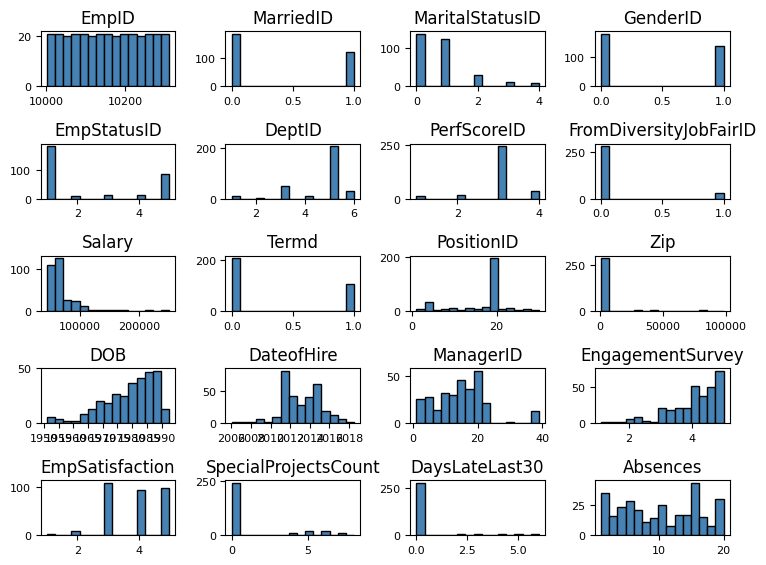

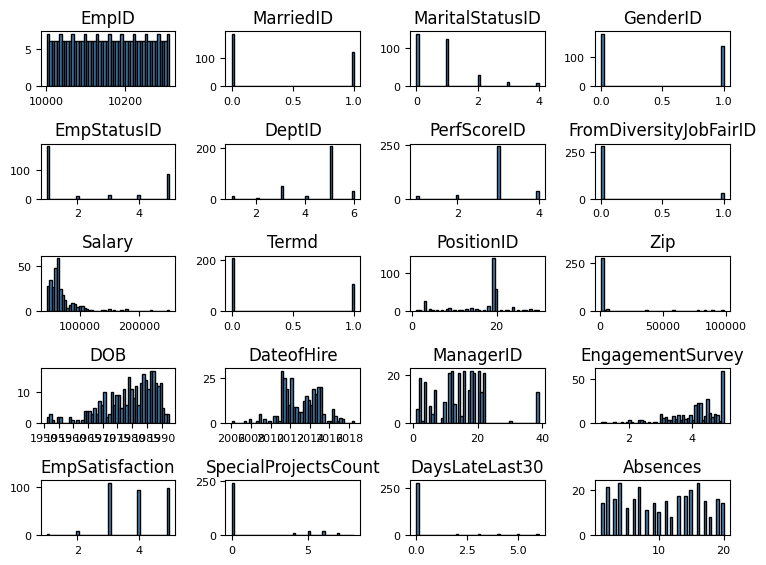

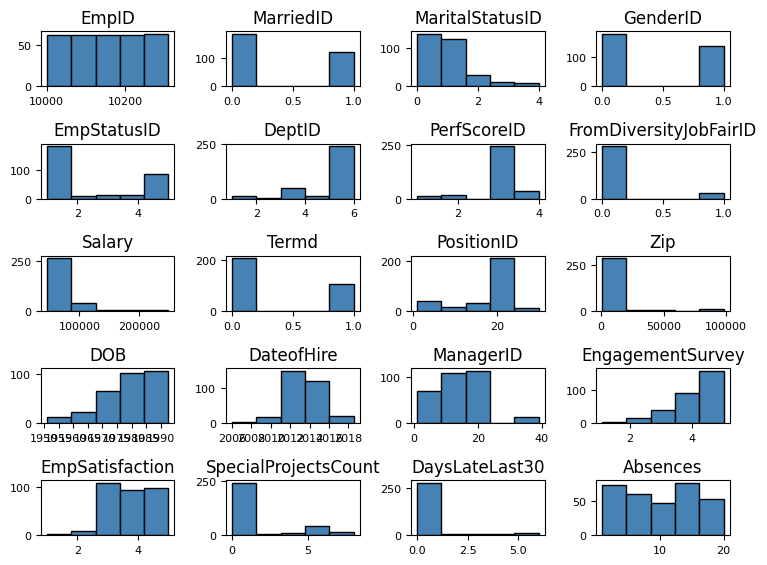

In [84]:
table.hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0, xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))   

table.hist(bins=50, color='steelblue', edgecolor='black', linewidth=1.0, xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))

table.hist(bins=5, color='steelblue', edgecolor='black', linewidth=1.0, xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))

### Continuous, numeric attribute in 1-D

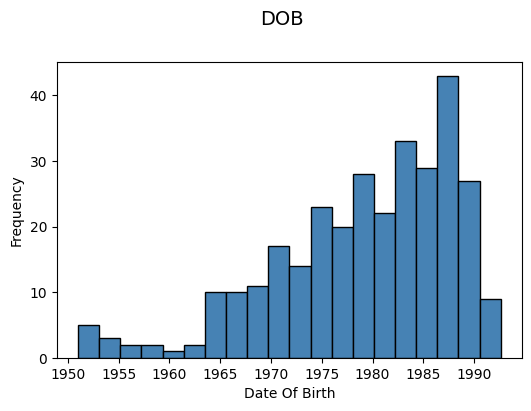

In [85]:
fig = plt.figure(figsize = (6,4))
title = fig.suptitle("DOB", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax = fig.add_subplot(1,1, 1)
ax.set_xlabel("Date Of Birth")
ax.set_ylabel("Frequency") 

freq, bins, patches = ax.hist(table["DOB"], color='steelblue', bins=20,
                                    edgecolor='black', linewidth=1)

> Die meisten Mitarbeiter:innen sind in der Mitte der 1980-Jahre geboren.

<Axes: xlabel='Salary in $', ylabel='Density'>

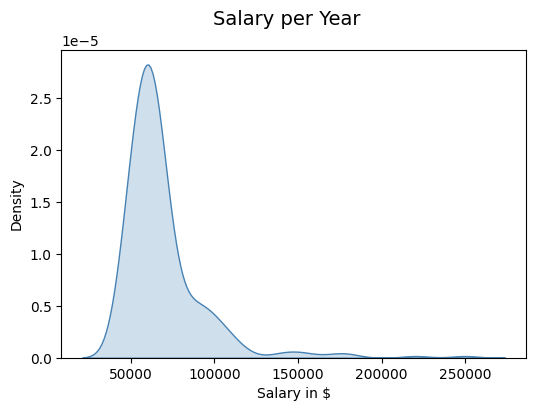

In [86]:
fig = plt.figure(figsize = (6, 4))
title = fig.suptitle("Salary per Year", fontsize=14)

ax1 = fig.add_subplot(1,1, 1)
ax1.set_xlabel("Salary in $")

ax1.set_ylabel("Density") 
sns.kdeplot(table["Salary"], ax=ax1, fill=True, color='steelblue')

> Die meisten Mitarbeiter:innen verdienen zwischen $50.000-80.000.

### Discrete, categorical attribute in 1-D

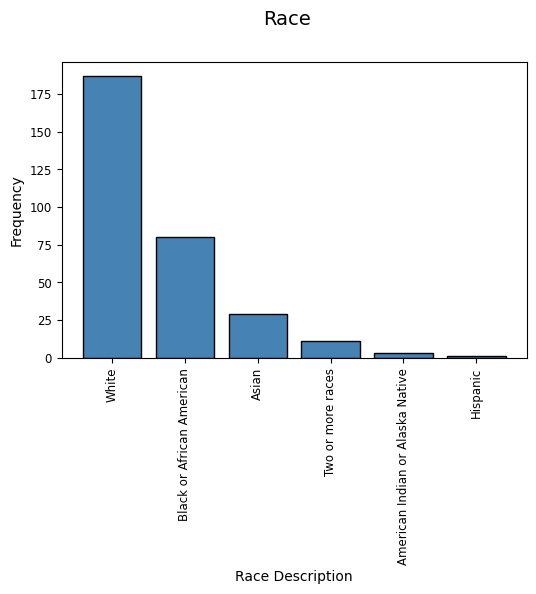

In [87]:
fig = plt.figure(figsize = (6, 4))
title = fig.suptitle("Race", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax = fig.add_subplot(1,1, 1)
ax.set_xlabel("Race Description")
ax.set_ylabel("Frequency") 
w_q = table['RaceDesc'].value_counts()
w_q = (list(w_q.index), list(w_q.values))
plt.xticks(rotation=90)
ax.tick_params(axis='both', which='major', labelsize=8.5)
bar = ax.bar(w_q[0], w_q[1], color='steelblue', 
        edgecolor='black', linewidth=1)

> die meisten Mitarbeiter:innen sind weiß. Die zweitgrößte Ethnicity sind African Americans. Am wenigsten sind Hispanics vertreten.

## Kündigungen

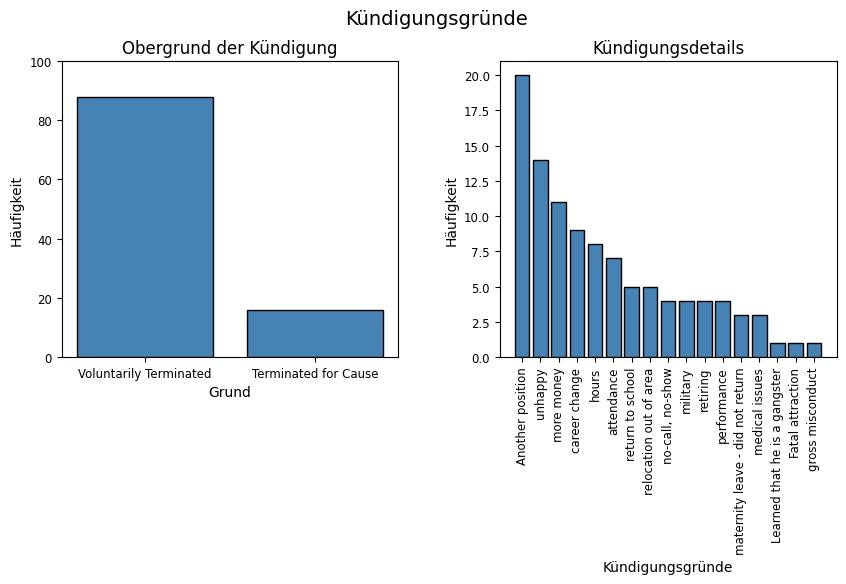

In [88]:
fig = plt.figure(figsize = (10, 4))
title = fig.suptitle("Kündigungsgründe", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(1,2, 1)
ax1.set_title("Obergrund der Kündigung")
ax1.set_xlabel("Grund")
ax1.set_ylabel("Häufigkeit") 
rw_q = terminated['EmploymentStatus'].value_counts()
rw_q = (list(rw_q.index), list(rw_q.values))
ax1.set_ylim([0, 100])
ax1.tick_params(axis='both', which='major', labelsize=8.5)
bar1 = ax1.bar(rw_q[0], rw_q[1], color='steelblue', 
        edgecolor='black', linewidth=1)

ax = fig.add_subplot(1,2, 2)
ax.set_title("Kündigungsdetails")
ax.set_xlabel("Kündigungsgründe")
ax.set_ylabel("Häufigkeit") 
w_q = terminated['TermReason'].value_counts()
w_q = (list(w_q.index), list(w_q.values))
plt.xticks(rotation=90)
ax.tick_params(axis='both', which='major', labelsize=8.5)
bar = ax.bar(w_q[0], w_q[1], color='steelblue', 
        edgecolor='black', linewidth=1)

> die meisten der Kündigungen sind freiwillig passiert.

> der häufigste Grund, wieso Menschen den Job verlassen haben, ist, dass sie eine andere Position gefunden haben. der zweithäufigste Grund ist, dass die Menschen unglücklich (mit dem Job) waren.

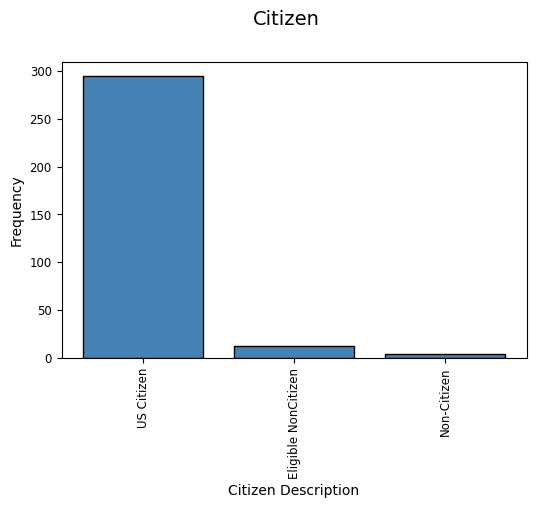

In [89]:
fig = plt.figure(figsize = (6, 4))
title = fig.suptitle("Citizen", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax = fig.add_subplot(1,1, 1)
ax.set_xlabel("Citizen Description")
ax.set_ylabel("Frequency") 
w_q = table['CitizenDesc'].value_counts()
w_q = (list(w_q.index), list(w_q.values))
plt.xticks(rotation=90)
ax.tick_params(axis='both', which='major', labelsize=8.5)
bar = ax.bar(w_q[0], w_q[1], color='steelblue', 
        edgecolor='black', linewidth=1)

> die allermeisten Mitarbeiter:innen sind US-Staatsbürger:innen.

# Multivariate Analysis

## Visualizing two dimensions

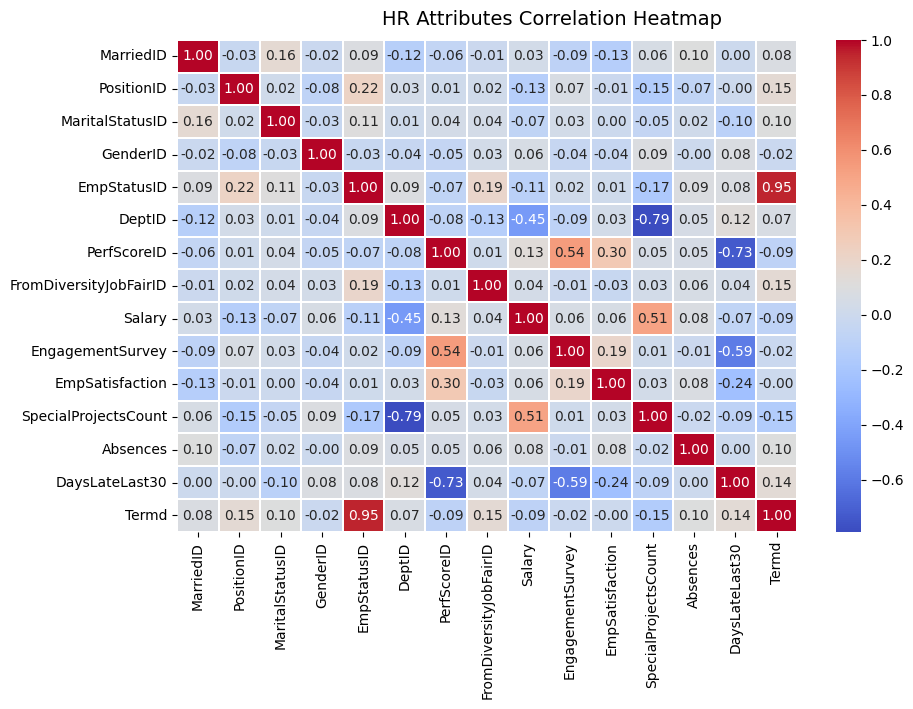

In [90]:
# table = table.drop("EmpID", axis=1)
f, ax = plt.subplots(figsize=(10, 6))
#subset = table.select_dtypes(include="number")
subset = ["MarriedID", "PositionID", "MaritalStatusID", "GenderID", "EmpStatusID", "DeptID", "PerfScoreID", "FromDiversityJobFairID", "Salary", "EngagementSurvey", "EmpSatisfaction", "SpecialProjectsCount", "Absences", "DaysLateLast30", "Termd"]
corr = table[subset].corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
            linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('HR Attributes Correlation Heatmap', fontsize=14)

Positive Korrelation zwischen: 
* EngagementSurvey und Performance Score ID (mäßig stark)
* Spezialprojekte und Gehalt: Je mehr Spezialprojekte, desto mehr Gehalt.

Negative Korrelation zwischen:
* Wie viele Tage Mitarbeiter:innen in den letzten 30 Tagen zu spät waren und wie gut ihr EngagementSurvey Score ist, und ebenso wie ihr Performance Score ist.
* Wie viele Spezialprojekte ein:e Mitarbeiter:in hat und die DepartmentID (vermutlich zufällige Korrelation)

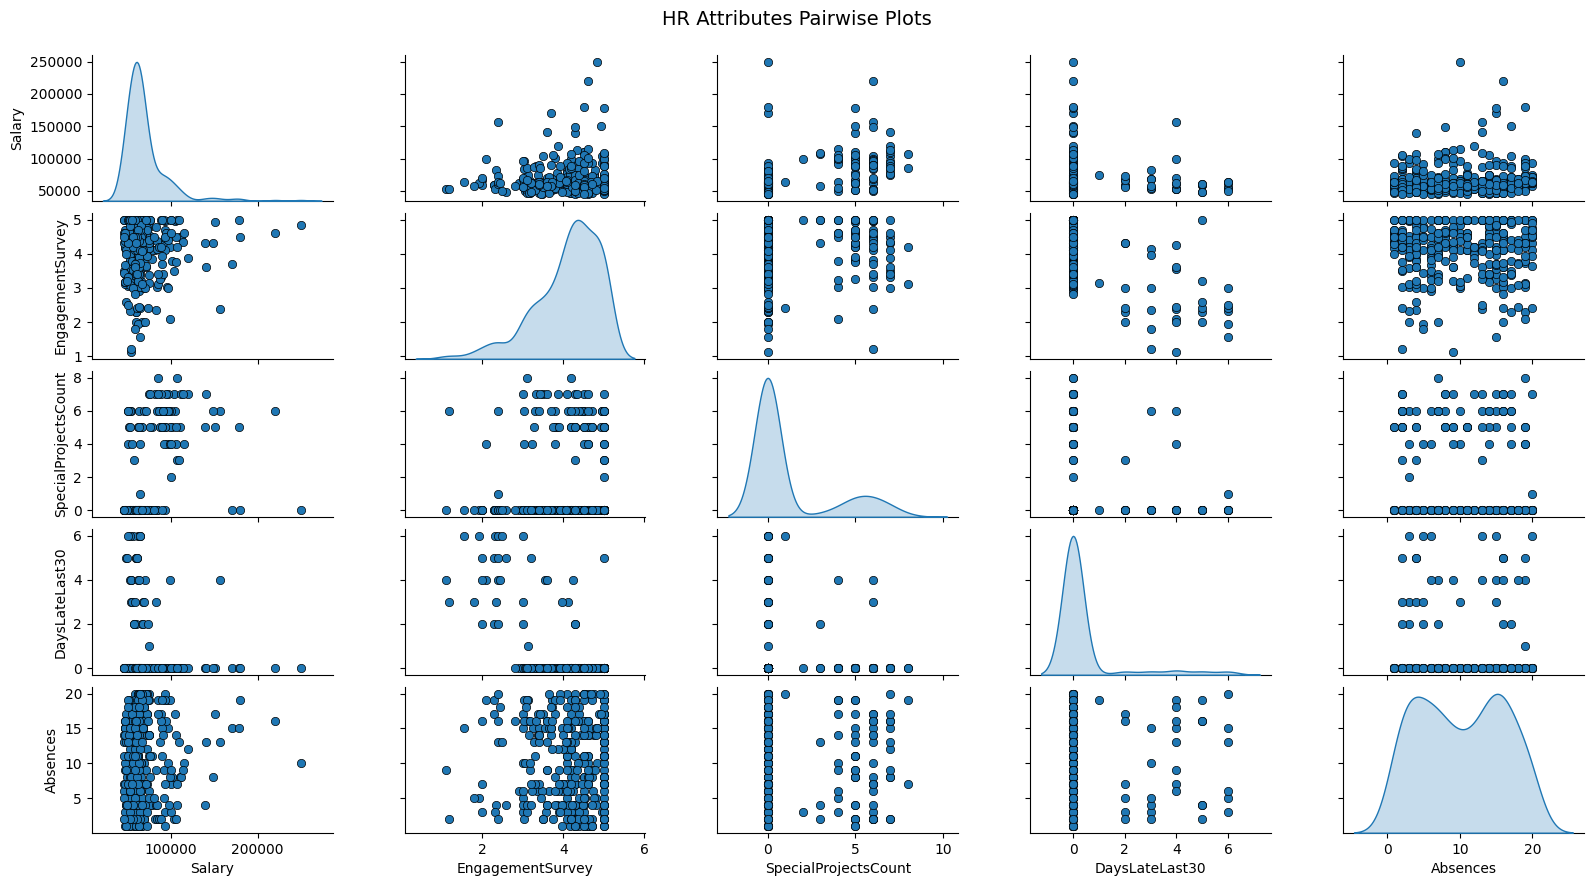

In [91]:
cols = ["DateofHire", "Salary", "EngagementSurvey", "SpecialProjectsCount", "DaysLateLast30", "Absences"]
pp = sns.pairplot(table[cols], height=1.8, aspect=1.8,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kind="kde", diag_kws=dict(fill=True))

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('HR Attributes Pairwise Plots', fontsize=14)

In [92]:
cols = ["PerfScoreID", "Salary", "EngagementSurvey", "EmpSatisfaction", "SpecialProjectsCount", "DaysLateLast30"]
subset_df = table[cols]

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
scaled_df = ss.fit_transform(subset_df)
scaled_df = pd.DataFrame(scaled_df, columns=cols)
final_df = pd.concat([scaled_df, table], axis=1)
final_df.head()

,PerfScoreID,Salary,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Employee_Name,EmpID,MarriedID,MaritalStatusID,...,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences,readableGender
0,1.744516,-0.259382,0.621302,1.222022,-0.519538,-0.320937,"Adinolfi, Wilson K",10026,0,0,...,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1,M
1,0.038401,1.410101,1.077769,-0.981160,2.038398,-0.320937,"Ait Sidi, Karthikeyan",10084,1,1,...,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17,M
2,0.038401,-0.161875,-1.382080,-0.981160,-0.519538,-0.320937,"Akinkuolie, Sarah",10196,1,1,...,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3,F
3,0.038401,-0.160442,0.925613,1.222022,-0.519538,-0.320937,"Alagbe,Trina",10088,1,1,...,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15,F
4,0.038401,-0.724461,1.128487,0.120431,-0.519538,-0.320937,"Anderson, Carol",10069,0,2,...,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2,F


### Two Continuous Numeric attributes 

Text(0.5, 1.05, 'Salary - Engagement Survey')

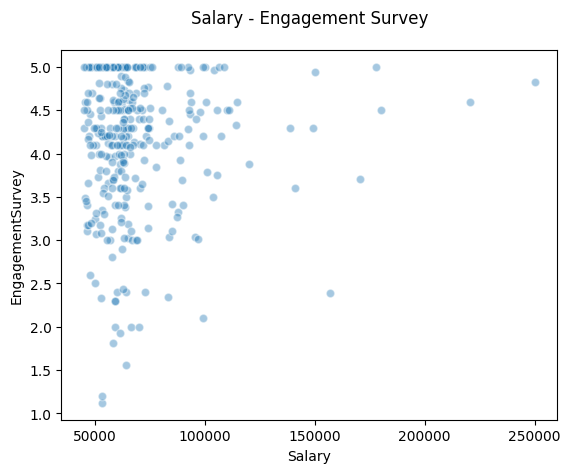

In [93]:
plt.scatter(table['Salary'], table['EngagementSurvey'],
            alpha=0.4, edgecolors='w')

plt.xlabel('Salary')
plt.ylabel('EngagementSurvey')
plt.title('Salary - Engagement Survey',y=1.05)

Es gibt keinen offensichtlichen Zusammenhang zwischen Gehalt und dem Engagement Survey Score.

### Two Discrete Categorical attributes 

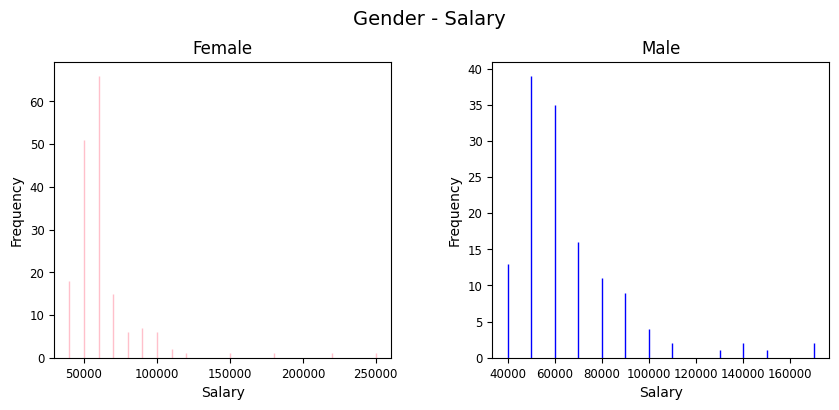

In [94]:
fig = plt.figure(figsize = (10, 4))
title = fig.suptitle("Gender - Salary", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(1,2, 1)
ax1.set_title("Female")
ax1.set_xlabel("Salary")
ax1.set_ylabel("Frequency")
roundedToThousandF = (female['Salary'] / 10000).astype(int) * 10000
rw_q = roundedToThousandF.value_counts()
rw_q = (list(rw_q.index), list(rw_q.values))

ax1.tick_params(axis='both', which='major', labelsize=8.5)
bar1 = ax1.bar(rw_q[0], rw_q[1], color='pink', 
        edgecolor='pink', linewidth=1)


ax2 = fig.add_subplot(1,2, 2)
ax2.set_title("Male")
ax2.set_xlabel("Salary")
ax2.set_ylabel("Frequency")
roundedToThousandM = (male['Salary'] / 10000).astype(int) *10000
ww_q = roundedToThousandM.value_counts()
ww_q = (list(ww_q.index), list(ww_q.values))

ax2.tick_params(axis='both', which='major', labelsize=8.5)
bar2 = ax2.bar(ww_q[0], ww_q[1], color='blue', 
        edgecolor='blue', linewidth=1)

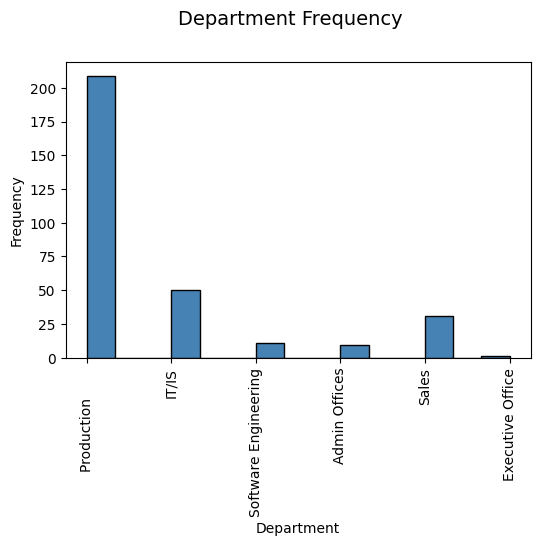

In [95]:
fig = plt.figure(figsize = (6,4))
title = fig.suptitle("Department Frequency", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax = fig.add_subplot(1,1, 1)
plt.xticks(rotation=90)
ax.set_xlabel("Department")
ax.set_ylabel("Frequency") 

freq, bins, patches = ax.hist(table['Department'], color='steelblue', bins=15,
                                    edgecolor='black', linewidth=1)

> Die meisten Mitarbeiter:innen arbeiten in der Produktion.

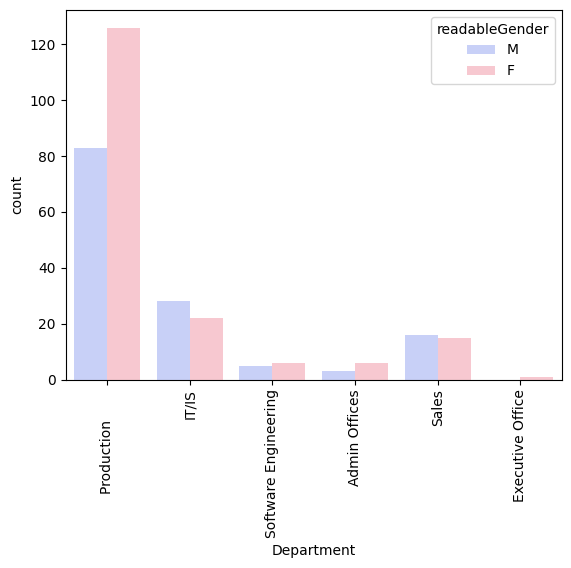

In [96]:
plt.xticks(rotation=90)
cp = sns.countplot(x="Department", hue="readableGender", data=table, 
                   palette=genderPalette)

> Es arbeiten mehr Frauen als Männer in der Produktion, aber mehr Männer in der IT/IS.

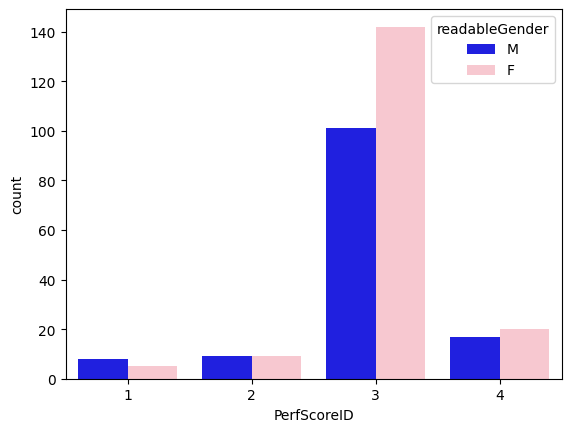

In [97]:
cp = sns.countplot(x="PerfScoreID", hue="readableGender", data=table, 
                   palette={"F": "pink", "M": "blue"})

### Mixed attributes (numeric & categorical)

<Axes: title={'center': 'Male'}, xlabel='Salary in $', ylabel='Density'>

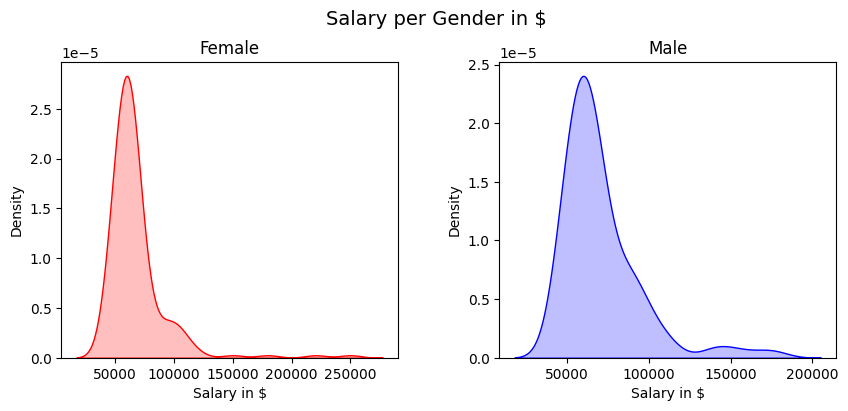

In [98]:
fig = plt.figure(figsize = (10, 4))
title = fig.suptitle("Salary per Gender in $", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(1,2, 1)
ax1.set_title("Female")
ax1.set_xlabel("Salary in $")
ax1.set_ylabel("Density") 
sns.kdeplot(female['Salary'], ax=ax1, fill=True, color='r')

ax2 = fig.add_subplot(1,2, 2)
ax2.set_title("Male")
ax2.set_xlabel("Salary in $")
ax2.set_ylabel("Density") 
sns.kdeplot(male['Salary'], ax=ax2, fill=True, color='b')

> Männer verdienen mehr und haben auch eine breite Streuung in ihrem Gehalt.

Text(0, 0.5, 'Engagement Survey Score')

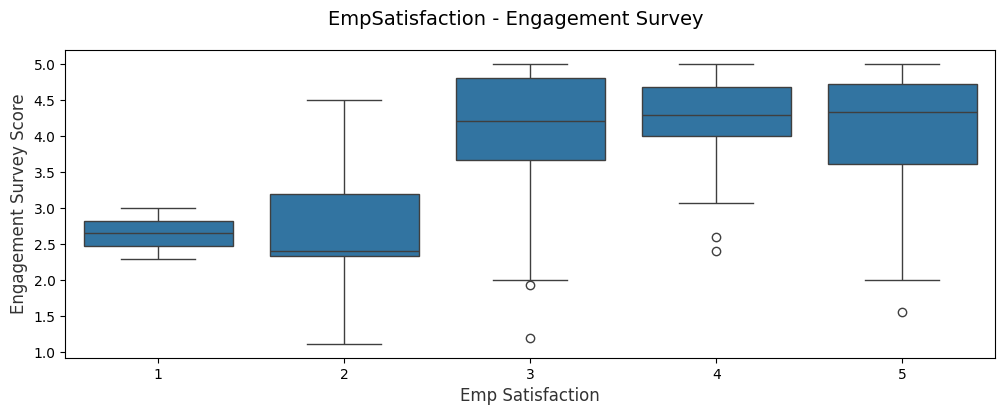

In [99]:
f, (ax) = plt.subplots(1, 1, figsize=(12, 4))
f.suptitle('EmpSatisfaction - Engagement Survey', fontsize=14)

sns.boxplot(x="EmpSatisfaction", y="EngagementSurvey", data=table,  ax=ax)
ax.set_xlabel("Emp Satisfaction",size = 12,alpha=0.8)
ax.set_ylabel("Engagement Survey Score",size = 12,alpha=0.8)

## Visualizing three dimensions

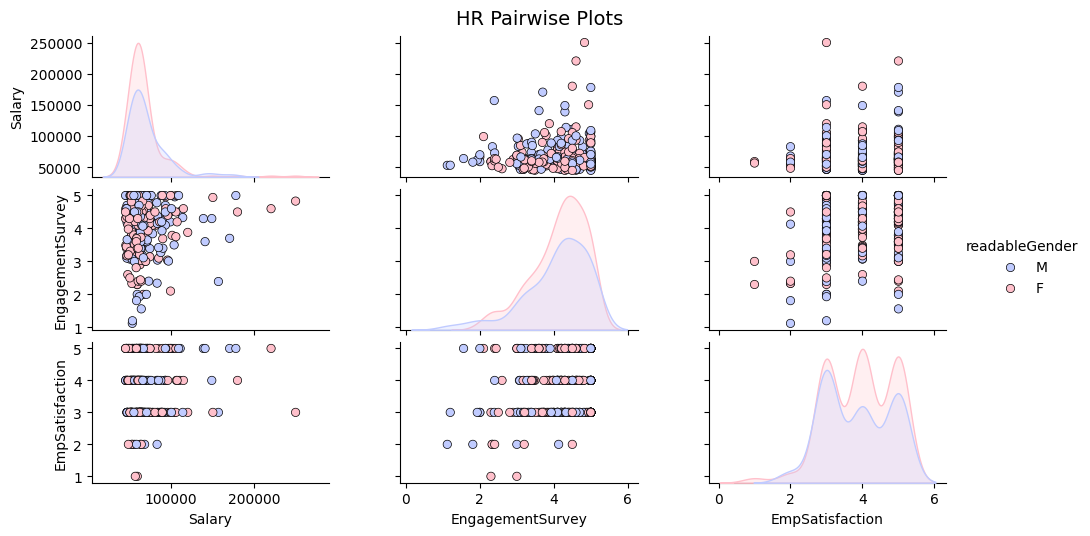

In [100]:
cols = ["readableGender", "DateofHire", "Salary", "EngagementSurvey", "EmpSatisfaction"]
genderPalette = {"F": "#FFC0CB", "M": "#C0CBFF"}
pp = sns.pairplot(table[cols], hue='readableGender', height=1.8, aspect=1.8, 
                  palette=genderPalette,
                  plot_kws=dict(edgecolor="black", linewidth=0.5))
fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('HR Pairwise Plots', fontsize=14)

### Three Continuous Numeric attributes

Text(0.5, 0, 'Performance Score')

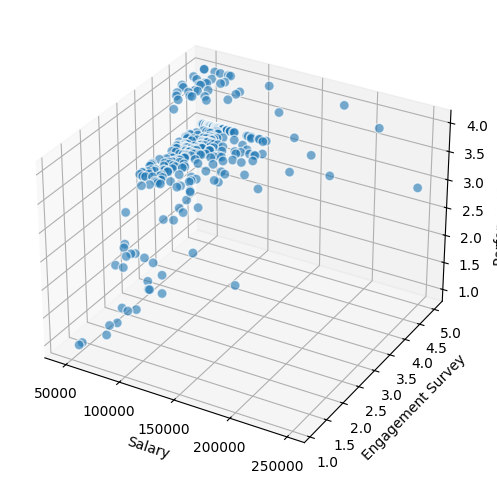

In [101]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

xs = table['Salary']
ys = table['EngagementSurvey']
zs = table['PerfScoreID']
ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w')

ax.set_xlabel('Salary')
ax.set_ylabel('Engagement Survey')
ax.set_zlabel('Performance Score')

> .. das war ein Test. man kann nicht besonders viel aus der Darstellung ablesen.

### Three Discrete Categorical attributes

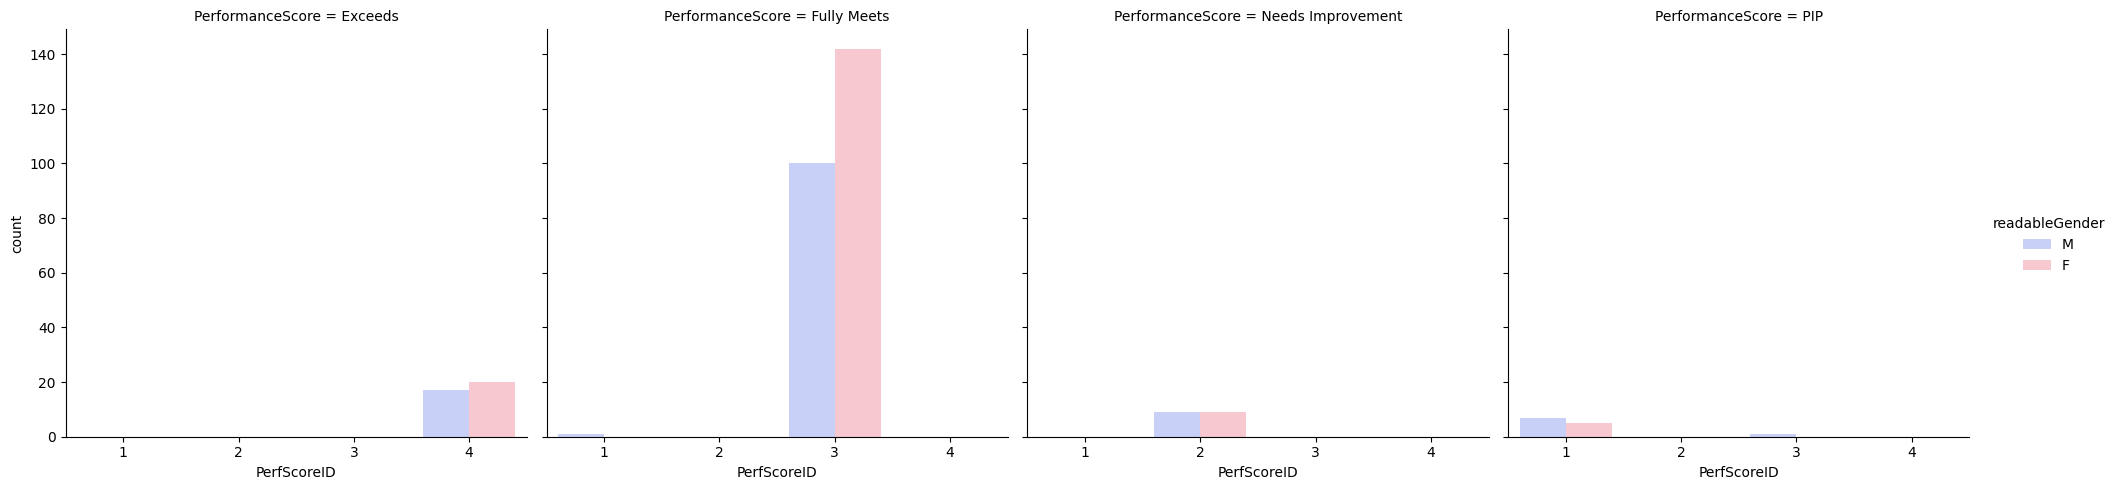

In [102]:
fc = sns.catplot(x="PerfScoreID", hue="readableGender", col="PerformanceScore", 
                    data=table, kind="count",
                    palette=genderPalette)

> Die meisten Mitarbeiter:innen haben eine einen "Fully Meets" PerformanceScore, wobei Frauen diesen häufiger haben, und auch etwas mehr Frauen den besten PerformanceScore "Exceeds" haben.

### Mixed attributes (Numeric & Categorical)

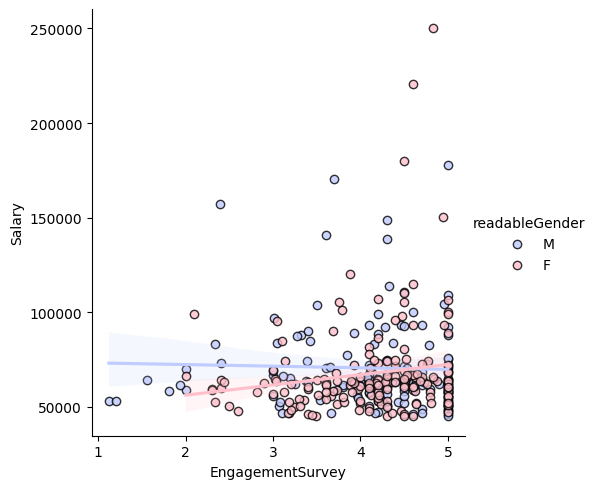

In [103]:
lp = sns.lmplot(x='EngagementSurvey', y='Salary', hue='readableGender', 
                palette=genderPalette,
                data=table, fit_reg=True, legend=True,
                scatter_kws=dict(edgecolor="k"))

* Männer haben ein kleineres Minimum bei der Survey.
* Männer haben ein höheres Durchschnittsgehalt, außer bei Frauen die einen sehr hohen EngagementSurvey-Score haben, da überragen Frauen Männer (vermutlich, weil es bei ihnen mehr Ausreißer nach oben, also hinsichtlich Gehalt gibt)

## Visualizing four dimensions

Text(0.5, 0, 'Absences')

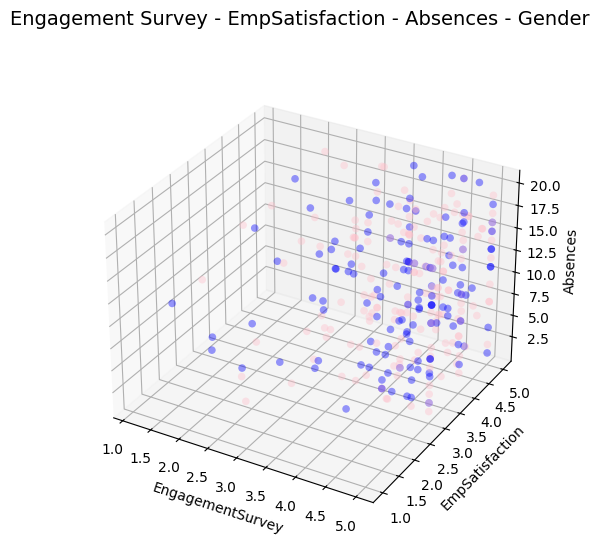

In [104]:
fig = plt.figure(figsize=(8, 6))
t = fig.suptitle('Engagement Survey - EmpSatisfaction - Absences - Gender', fontsize=14)
ax = fig.add_subplot(111, projection='3d')

xs = list(table['EngagementSurvey'])
ys = list(table['EmpSatisfaction'])
zs = list(table['Absences'])
data_points = [(x, y, z) for x, y, z in zip(xs, ys, zs)]
colors = ['pink' if g=="F" else 'blue' for g in list(table['Sex'])]

for data, color in zip(data_points, colors):
    x, y, z = data
    ax.scatter(x, y, z, alpha=0.4, c=color, edgecolors='none', s=30)

ax.set_xlabel('EngagementSurvey')
ax.set_ylabel('EmpSatisfaction')
ax.set_zlabel('Absences')

> wieder nur ein Test. wenig Aussage.